<a href="https://colab.research.google.com/github/AbiXnash/HyperCoar-DAM-A-Robust-Intrusion-Detection-System-for-Enhancing-IIoT-Networks-Protection/blob/main/UNSW_MUL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Load the datasets
bin_data = pd.read_csv("/content/bin_data.csv")
multi_data = pd.read_csv("/content/multi_data.csv")

In [ ]:
bin_data.shape

(83911, 60)

In [ ]:
multi_data.shape

(85614, 70)

In [ ]:
bin_data.head()

,Unnamed: 0,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_snmp,service_ssh,service_ssl,state_ACC,state_CON,state_FIN,state_INT,state_REQ,state_RST,label
0,3,2.802759e-02,0.001033,0.001089,0.000039,0.000053,0.000014,0.138393,0.992126,0.000001,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,11,3.488503e-02,0.005730,0.002541,0.003919,0.000151,0.000043,0.138393,0.992126,0.000092,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,15,3.333360e-08,0.000094,0.000000,0.000005,0.000000,0.500000,0.995536,0.000000,0.119792,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,17,6.559318e-03,0.000845,0.000726,0.000055,0.000075,0.000043,0.138393,0.992126,0.000007,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,21,5.633661e-03,0.000845,0.000545,0.000065,0.000018,0.000044,0.995536,0.992126,0.000009,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
multi_data.head()

,Unnamed: 0,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,...,state_RST,attack_cat_Analysis,attack_cat_Backdoor,attack_cat_DoS,attack_cat_Exploits,attack_cat_Fuzzers,attack_cat_Generic,attack_cat_Normal,attack_cat_Reconnaissance,attack_cat_Worms
0,3,4,2.802759e-02,0.001033,0.001089,0.000039,0.000053,0.000014,0.138393,0.992126,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,11,12,3.488503e-02,0.005730,0.002541,0.003919,0.000151,0.000043,0.138393,0.992126,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,15,16,3.333360e-08,0.000094,0.000000,0.000005,0.000000,0.500000,0.995536,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,17,18,6.559318e-03,0.000845,0.000726,0.000055,0.000075,0.000043,0.138393,0.992126,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,21,22,5.633661e-03,0.000845,0.000545,0.000065,0.000018,0.000044,0.995536,0.992126,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


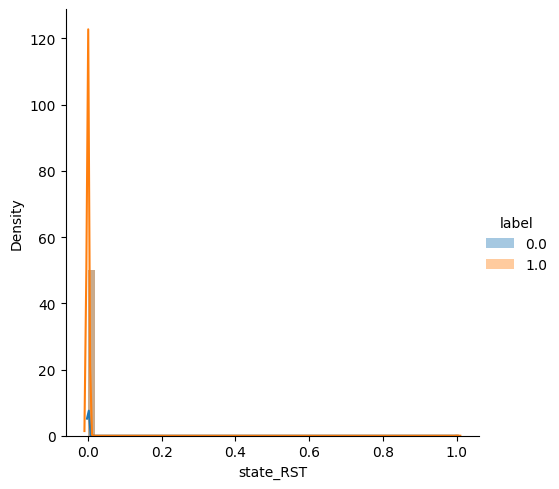

In [ ]:
import seaborn as sns
sns.FacetGrid(bin_data,hue = "label",height = 5,).map(sns.distplot,'state_RST').add_legend()

plt.show()


In [ ]:
# Split data
X = multi_data.drop(columns=['label'], axis=1)
Y = multi_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [ ]:
# Reshape data for LSTM input
X_train_reshaped = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:

# Create the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(X_train_reshaped.shape[1], 1), return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(32))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dense(10, activation='softmax'))  # Assuming 10 classes for multiclass classification

In [ ]:
# Compile the model
adam_optimizer = Adam(learning_rate=1e-4)
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('lstm_best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
lstm_history = lstm_model.fit(
    X_train_reshaped, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test_reshaped, y_test),
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/50
1455/1455 [==============================] - 130s 86ms/step - loss: 1.3664 - accuracy: 0.4920 - val_loss: 1.2825 - val_accuracy: 0.4985
Epoch 2/50
   2/1455 [..............................] - ETA: 1:35 - loss: 1.2727 - accuracy: 0.5078

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1455/1455 [==============================] - 121s 83ms/step - loss: 0.9069 - accuracy: 0.6735 - val_loss: 0.4666 - val_accuracy: 0.8583
Epoch 3/50
1455/1455 [==============================] - 120s 83ms/step - loss: 0.4318 - accuracy: 0.8764 - val_loss: 0.3902 - val_accuracy: 0.8828
Epoch 4/50
1455/1455 [==============================] - 120s 82ms/step - loss: 0.4009 - accuracy: 0.8825 - val_loss: 0.3841 - val_accuracy: 0.8809
Epoch 5/50
1455/1455 [==============================] - 120s 82ms/step - loss: 0.3907 - accuracy: 0.8833 - val_loss: 0.3823 - val_accuracy: 0.8819
Epoch 6/50
1455/1455 [==============================] - 121s 83ms/step - loss: 0.3834 - accuracy: 0.8837 - val_loss: 0.3738 - val_accuracy: 0.8832
Epoch 7/50
1455/1455 [==============================] - 122s 84ms/step - loss: 0.3759 - accuracy: 0.8844 - val_loss: 0.3661 - val_accuracy: 0.8828
Epoch 8/50
1455/1455 [==============================] - 121s 83ms/step - loss: 0.3710 - accuracy: 0.8842 - val_loss: 0.3701 - val

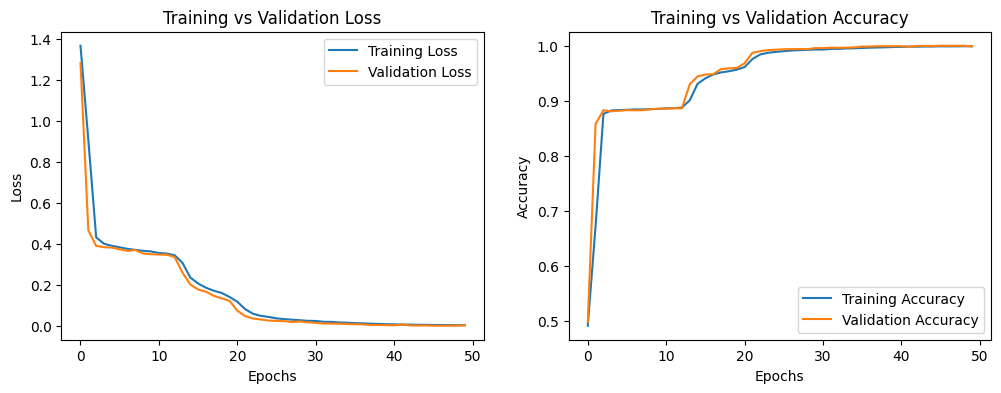

In [ ]:
# Plot training vs validation loss and accuracy
def plot_training_vs_validation(history):
    plt.figure(figsize=(12, 4))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training vs Validation Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.legend()

    plt.show()

# Call the plotting function
plot_training_vs_validation(lstm_history)

In [ ]:
# Evaluate model on test data
test_loss, test_accuracy = lstm_model.evaluate(X_test_reshaped, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


728/728 [==============================] - 15s 21ms/step - loss: 0.0035 - accuracy: 0.9988
Test Loss: 0.0034519273322075605
Test Accuracy: 0.9987967610359192
